## Automatic Number Plate Recognition (ANPR)  - EasyOCR + OpenCV 

1. Checking version of CUDA present in our system

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


2. Installing and Importing the Required Packages

In [2]:
!pip install easyocr

!pip install imutils

!pip install opencv-python-headless

!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached opencv_python_headless-4.5.4.60-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.6 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import easyocr

3. Converted Colored Image into Grayscale format

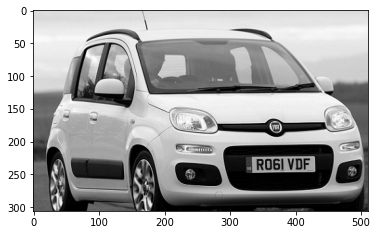

In [4]:
img = cv2.imread('/content/car1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

4. Apply Filter and Edge detection

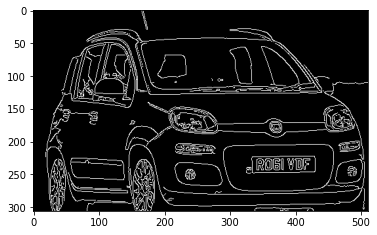

In [5]:
bfiller = cv2.bilateralFilter(gray, 11, 17, 17) # Noise Reduction
edged = cv2.Canny(bfiller, 30, 200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

5. Find Contours and apply mask

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
loaction = None

for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [8]:
location

array([[[333, 225]],

       [[336, 248]],

       [[430, 245]],

       [[429, 222]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

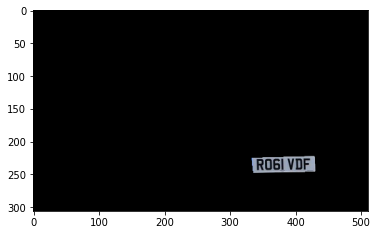

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

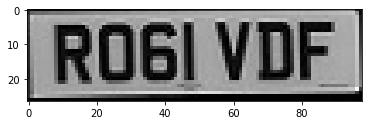

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

6. Use Easy Ocr to read text

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[2, 0], [94, 0], [94, 26], [2, 26]], 'RO6I VDF', 0.37802442068531805)]

7. Plot the result

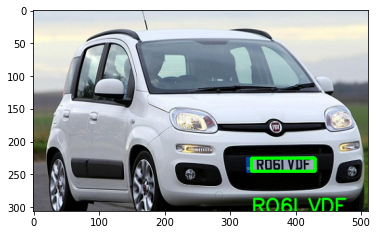

In [14]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA, bottomLeftOrigin=False)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))